# –ó–∞–¥–∞–Ω–∏–µ 3
## 1 –ß–∞—Å—Ç—å

In [25]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
from time import time
from math import sqrt, pi

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [35]:
class WinerProcess:
    def __init__(self, precision=10000):
        self.__private_precision = precision
        self.__private_xi = np.array([sps.norm.rvs(size=precision+1)])
        self.__private_k = np.arange(1, precision+1)

    def __getitem__(self, times):
        #—á—Ç–æ–±—ã —Ä–∞–±–æ—Ç–∞—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤–æ –∏ —Å —á–∏—Å–ª–æ–º, –∏ —Å–æ —Å–ø–∏—Å–∫–æ–º    
        times=np.append([], times)
        #–º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –Ω–æ–º–µ—Ä –æ—Ç—Ä–µ–∑–∫–∞
        leftboard = int(max(times)/pi)
        if(leftboard >= len(self.__private_xi)):
        #–≥–µ–Ω–µ—Ä–∞—Ü–∏—è —Ç–æ–≥–æ, —á–µ–≥–æ –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç
            self.__private_xi = np.append(self.__private_xi, sps.norm.rvs(size=(self.__private_precision+1)*(leftboard-len(self.__private_xi)+1))).reshape(leftboard+1, self.__private_precision+1)
        return [self._X_t(i) for i in times]
    
    def _X_t(self, t):
        #–Ω–æ–º–µ—Ä –æ—Ç—Ä–µ–∑–∫–∞
        leftboard = int(t/pi)
        realt = t - pi*leftboard 
        #—Å–∫–ª–µ–π–∫–∞ —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º–∏
        # –¥–ª—è –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ—Å—Ç–∏ –Ω—É–∂–Ω–æ –ø—Ä–∏–±–∞–≤–∏—Ç—å –∫ –∑–Ω–∞—á–µ–Ω–∏—é –≤ t —Å—É–º–º—É –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Ç–æ—á–∫–∞—Ö –≤–∏–¥–∞ pi*n - —á—Ç–æ–±—ã –∑–Ω–∞—á–µ–Ω–∏—è –≤ —ç—Ç–∏—Ö —Ç–æ—á–∫–∞—Ö —Å–æ–≤–ø–∞–¥–∞–ª–∏
        answer = np.dot(self.__private_xi[:leftboard, 0], np.arange(1, leftboard+1)) * sqrt(pi)
        # –ø–µ—Ä–≤–æ–µ —Å–ª–∞–≥–∞–µ–º–æ–µ–∏–≤ —Å—É–º–º–µ
        answer += self.__private_xi[leftboard][0]*realt/sqrt(pi)
        #–æ—Å—Ç–∞–≤—à–∞—è—Å—è —Å—É–º–º–∞
        answer += sqrt(2/pi) * np.dot(np.sin(self.__private_k * t)/self.__private_k, self.__private_xi[leftboard][1:])
        return answer

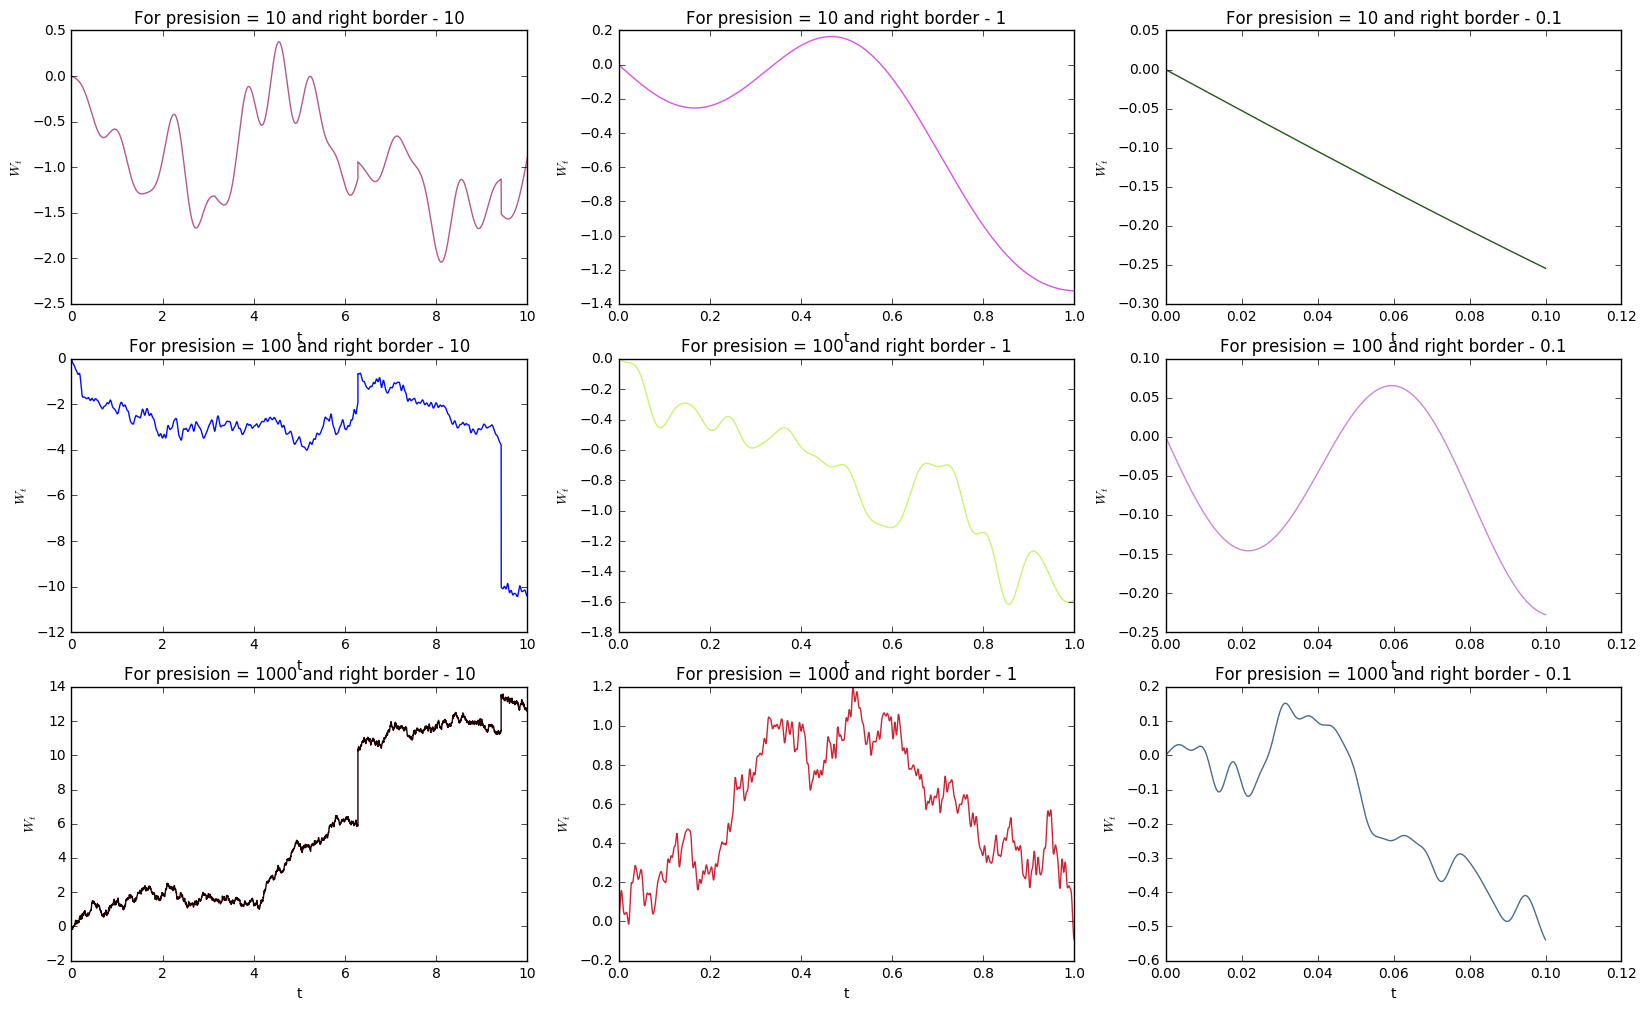

In [36]:
ns = [10, 100, 1000]
cuts = [[0, 10], [0, 1], [0, 0.1]]
plt.figure(figsize=(20, 12))
for i in [0, 1, 2]:
    for j in [0, 1, 2]:
        grid = np.linspace(0, cuts[j][1], 100000)
        wp = WinerProcess(precision=ns[i])
        traj = wp[grid]
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.plot(grid, traj, color=np.random.rand(3), lw=1)
        plt.title('For presision = '+str(ns[i])+' and right border - '+str(cuts[j][1]))
        plt.xlabel('t')
        plt.ylabel(u'$W_t$')

–ò–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤ –≤–∏–¥–Ω–æ, —á—Ç–æ —á–µ–º –±–æ–ª—å—à–µ —Å–ª–∞–≥–∞–µ–º—ã—Ö, —Ç–µ–º –º–µ–Ω–µ–µ –≥–ª–∞–¥–∫–∞—è —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—è, –∏ —Ç–µ–º –±–æ–ª–µ–µ —ç—Ç–æ –ø–æ—Ö–æ–∂–µ –Ω–∞ –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–∏–π –ø—Ä–æ—Ü–µ—Å—Å, —á—Ç–æ –ª–æ–≥–∏—á–Ω–æ, —Ç–∫ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è —Ç–æ—á–Ω–æ—Å—Ç—å –∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–∏–±–ª–∏–∂–∞–µ—Ç—Å—è –∫ —Ä–µ–∞–ª—å–Ω–æ–º—É. –¢–∞–∫–∂–µ –ø—Ä–æ—Ü–µ—Å—Å —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –º–µ–Ω–µ–µ –≥–ª–∞–¥–∫–∏–º –ø—Ä–∏—É–≤–µ–ª–∏—Ü–µ–Ω–∏–∏ –¥–ª–∏–Ω—ã –æ—Ç—Ä–µ–∑–∫–∞, —Ç–∞–∫ –∫–∞–∫, —á–µ–º –±–ª–∏–∂–µ –∑–Ω–∞—á–µ–Ω–∏—è t, —Ç–µ–º –±–ª–∏–∂–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏—Ö —Å–∏–Ω—É—Å–æ–≤. –ü–æ—ç—Ç–æ–º—É, –µ—Å–ª–∏ –º—ã —Ö–æ—Ç–∏–º –ø—Ä–∏–±–ª–∏–∑–∏—Ç—å —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—é –∫ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –Ω–æ –Ω–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–∞–≥–∞–µ–º—ã—Ö, –º–æ–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å —Ä–∞–∑–º–µ—Ä –æ—Ç—Ä–µ–∑–∫–∞, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º –ø—Ä–æ–≤–æ–¥—è—Ç—Å—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è.

#### –ü—Ä–æ–±–ª–µ–º–∞: 
–ø—Ä–∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏–∏ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –±–æ–ª—å—à–∏—Ö t –≤ –∫–∞–∫–æ–π-—Ç–æ –º–æ–º–µ–Ω—Ç –∫–æ–Ω—á–∞–µ—Ç—Å—è –ø–∞–º—è—Ç—å, —Ç–∞–∫ –∫–∞–∫ –º—ã –≤—ã–Ω—É–∂–¥–µ–Ω—ã —Ö—Ä–∞–Ω–∏—Ç—å –≤—Å–µ —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã –¥–ª—è –≤—Å–µ—Ö –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –æ—Ç—Ä–µ–∑–∫–æ–≤ - –Ω–æ –µ—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏—è t –∑–∞—Ä–∞–Ω–µ–µ –∏–∑–≤–µ—Å—Ç–Ω—ã, —Ç–æ –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ - –Ω–µ —Ö—Ä–∞–Ω–∏—Ç—å –≤—Å–µ(—É–¥–∞–ª—è—Ç—å –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –æ—Ç—Ä–µ–∑–∫–æ–≤) –∏ –Ω–µ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –ª–∏—à–Ω–µ–µ(–¥–ª—è –æ—Ç—Ä–µ–∑–∫–æ–≤, –≤ –∫–æ—Ç–æ—Ä—ã–µ –º—ã –Ω–µ –ø–æ–ø–∞–¥–∞–µ–º). 

In [30]:
def winer_proccess_path(end_time, step, precision=10000):
    times = np.arange(0, end_time, step)
    values = np.zeros_like(times, dtype=float)
    #–Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –≤—Å–µ —Ö—Ä–∞–Ω–∏—Ç—å
    #–Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ —Ç–∞–∫ –º–Ω–æ–≥–æ –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å(–µ—Å–ª–∏ times –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—ã–π)
    
    #—Ç–æ, —á—Ç–æ –Ω—É–∂–Ω–æ –¥–æ–±–∞–≤–ª—è—Ç—å –∫ –∑–Ω–∞—á–µ–Ω–∏—é –Ω–∞ –¥–∞–Ω–Ω–æ–º –æ—Ç—Ä–µ–∑–∫–µ - –¥–Ω—è –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ—Å—Ç–∏
    mustbeadded = 0.
    #–ª–µ–≤–∞—è –≥—Ä–∞–Ω–∏—Ü–∞ —Ç–µ–∫—É—â–µ–≥–æ –æ—Ç—Ä–µ–∑–∫–∞
    leftboard = -1
    #—Å–ø–∏—Å–æ–∫ —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ –æ—Ç—Ä–µ–∑–∫–∞
    xi = [0]
    i = 0
    
    k = np.arange(1, precision+1)
    
    for t in times:
        # –Ω–∞—á–∞–ª–æ –æ—Ç—Ä–µ–∑–∫–∞, –≤ –∫–æ—Ç–æ—Ä–æ–º –Ω–∞—Ö–æ–¥–∏—Ç—Å—è t
        board = int(t/pi)
        # –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –Ω–æ–≤—ã–µ —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã
        if(board > leftboard):
            #xi_0 –¥–ª—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –æ—Ç—Ä–µ–∑–∫–æ–≤
            xi_0 = sps.norm.rvs(size = board-leftboard-1)
            #—ç—Ç–æ –±—É–¥–µ—Ç –Ω—É–∂–Ω–æ –∏ –≤—Å–µ–º –ø–æ—Å–ª–µ–¥—É—é—â–∏–º
            mustbeadded += np.dot(xi_0, np.arange(leftboard+1, board))*sqrt(pi)
            #–¥–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –æ—Ç—Ä–µ–∑–∫–∞ –≤ —Ç leftboard*pi
            mustbeadded += leftboard*xi[0]*sqrt(pi)
            
            #–≥–µ–Ω–µ—Ä–∞—Ü–∏—è –Ω–æ–≤–æ–≥–æ —Å–ø–∏—Å–∫–∞ xi
            xi = sps.norm.rvs(size = precision+1)
            
        #–Ω–∞—Ö–æ–¥–∏–º—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ—Ç—Ä–µ–∑–∫–∞, –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ —Å–≤ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω—ã
        #–≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è
        values[i] = mustbeadded + xi[0]*t/sqrt(pi) + sqrt(2/pi)*np.dot(np.sin(k*t)/k, xi[1:])
        i +=1
    return times, values

In [31]:
%time times, values = winer_proccess_path(50000, 0.1)

CPU times: user 11min 55s, sys: 3.02 s, total: 11min 58s
Wall time: 12min 6s


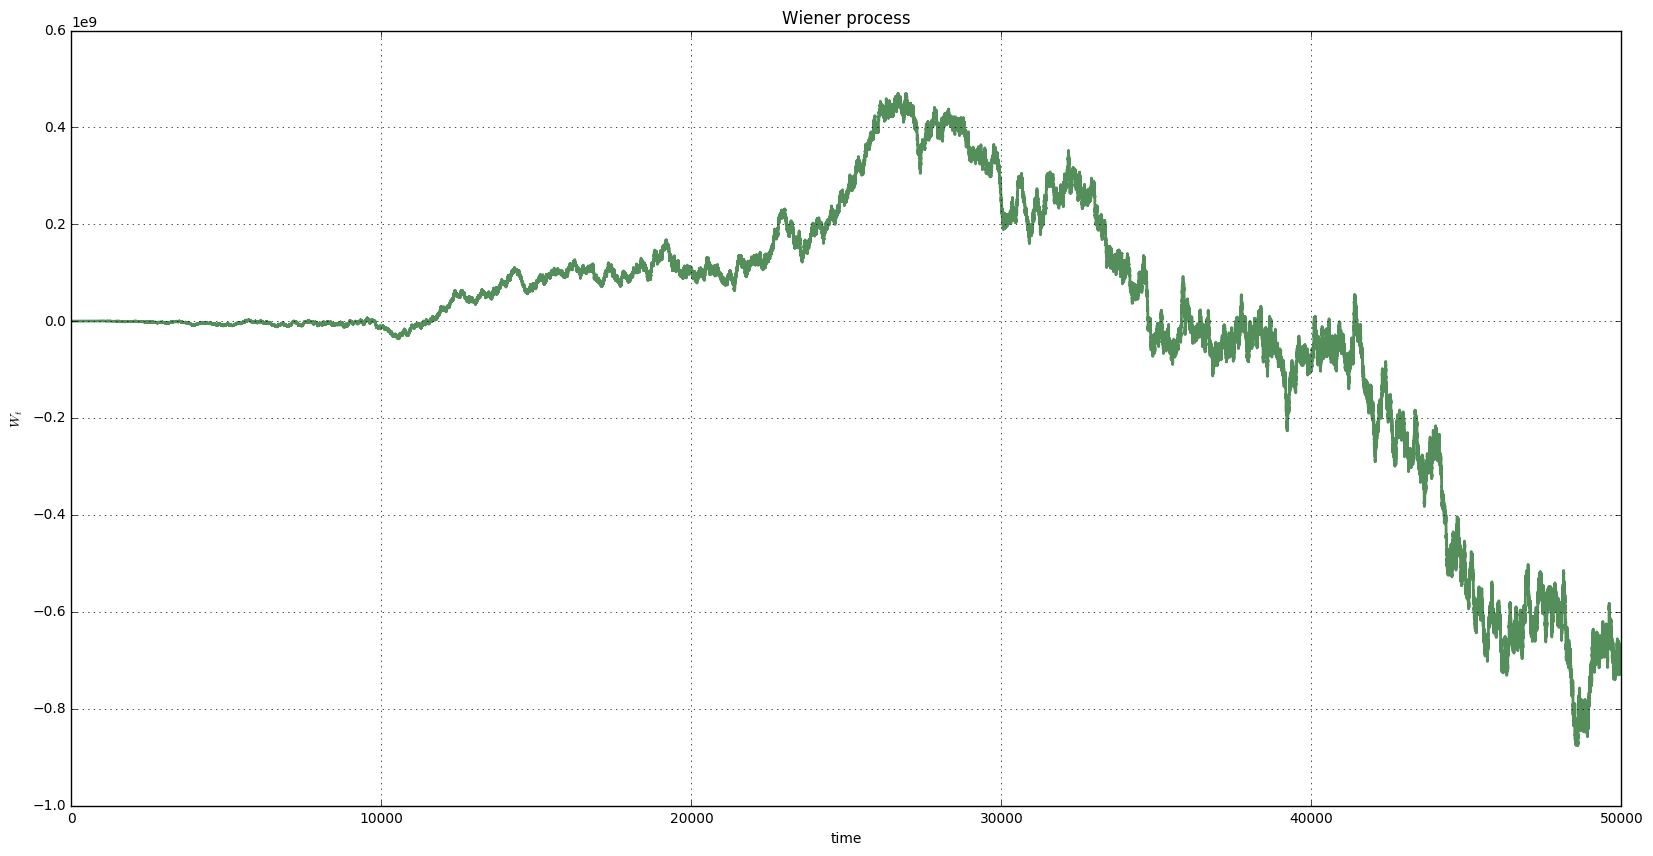

In [38]:
plt.figure(figsize=(20, 10))
plt.plot(times, values, lw=2, color=np.random.rand(3))
plt.grid()
plt.title('Wiener process')
plt.xlabel('time')
plt.ylabel(u'$W_t$')
plt.show()

## 2 –ß–∞—Å—Ç—å
–ó–∞–¥–∞—á–∞:
–ü–æ—Å—Ç–∞–≤–∏—Ç—å –∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ $ùëã_ùë°$, –≥–¥–µ $ùëã_ùë° -$ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–∞–∫—Å–∏–º—É–º–æ–≤ –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ [0, ùë°].

In [2]:
max_time = 20000
path_count = 50
t = np.arange(0, max_time, 0.1)
paths = np.zeros((path_count, 10 * max_time))

# –ò—Å–ø–æ–ª—å–∑—É—é —Ñ–∞–π–ª—ã —Å –Ω–æ–º–µ—Ä–∞–º–∏ 1, 3, 5, 7, 9
for i in np.arange(5):
    paths[i*10:(i+1)*10] = \
        np.loadtxt('winer_paths_{}.txt'.format(2*i+1))[:, :10 * max_time]

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞

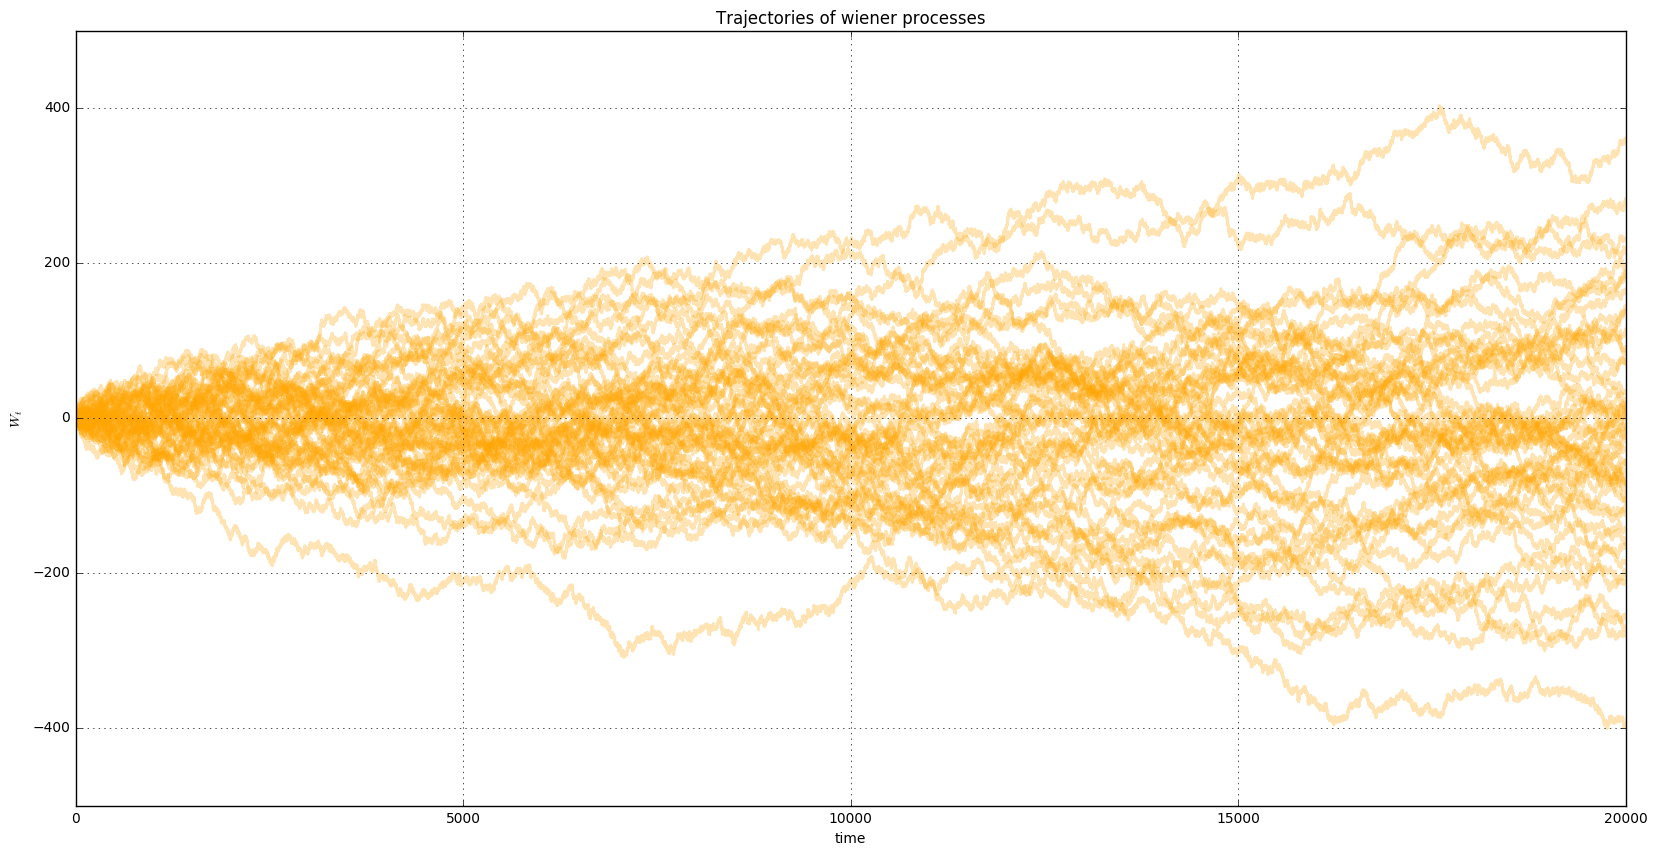

In [3]:
plt.figure(figsize=(20, 10))
for i in range(path_count):
    plt.plot(t, paths[i], lw=2, alpha=0.3, color='orange')
plt.grid()
plt.title('Trajectories of wiener processes')
plt.xlabel('time')
plt.ylabel(u'$W_t$')
plt.show()

–î–ª—è –º–æ–µ–π –∑–∞–¥–∞—á–∏ —ç—Ç–æ –Ω–µ –æ—á–µ–Ω—å –Ω–∞–≥–ª—è–¥–Ω–æ. –í–æ–∑—å–º—É –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–æ—Ü–µ—Å—Å–æ–≤ –∏ –ø—Ä–æ–≤–µ–¥—É –¥–ª—è –∏—Ö —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π –º–∞–∫—Å–∏–º—É–º—ã –Ω–∞ –æ—Ç—Ä–µ–∑–∫–∞—Ö [0, t], –∞ —Ç–∞–∫–∂–µ –æ—Ç–º–µ—á—É —Ç–æ—á–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –¥–æ—Å—Ç–∏–≥–∞—é—Ç—Å—è –º–∞–∫—Å–∏–º—É–º—ã (–¥–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –µ—â–µ –ø—Ä–∏–±–ª–∏–∂—É –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –æ–±–ª–∞—Å—Ç–∏)

In [21]:
def research(numproc):
    max1 = np.zeros(10*max_time)
    currmax = 0
    j = 0;
    for i in paths[numproc]:
        if(i > currmax):
            currmax = i
        max1[j] = currmax
        j += 1
    
    x = []
    y = []
    for i in np.arange(len(t)):
        if(paths[numproc][i] >= max1[i]):
            x.append(t[i])
            y.append(max1[i])
    
    plt.figure(figsize=(20, 10))
    plt.plot(t, paths[numproc], lw=2, alpha=0.3, color = 'purple', label = "wiener process")
    plt.plot(t, max1, lw=2, color='orange', label = "maximum")
    plt.scatter(x, y, color='red', label = "point of maximum")
    plt.legend()
    plt.title('Trajectories of wiener processes')
    plt.xlabel('time')
    plt.ylabel(u'$W_t$')
    plt.xlim((0, 20000))
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20, 10))
    plt.plot(t, paths[numproc], lw=2, alpha=0.3, color = 'purple', label = "wiener process")
    plt.plot(t, max1, lw=2, color='orange', label = "maximum")
    plt.scatter(x, y, color='red', label = "point of maximum")
    plt.xlim((0, 10))
    plt.ylim((-5, 6))
    plt.title('Trajectories of wiener processes')
    plt.xlabel('time')
    plt.ylabel(u'$W_t$')
    plt.grid()
    plt.show()

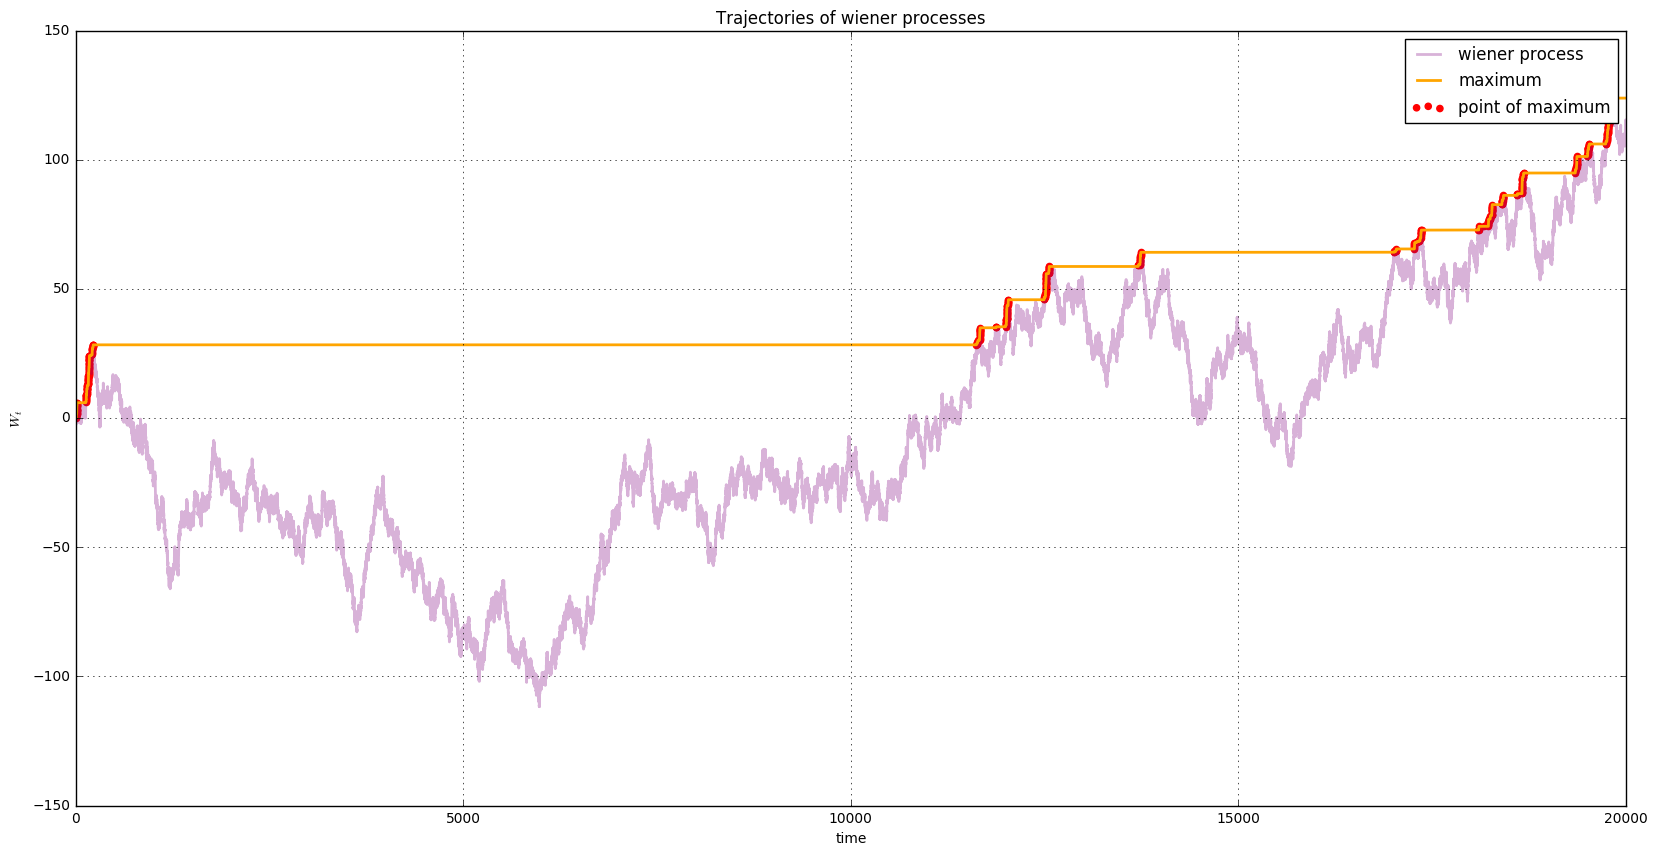

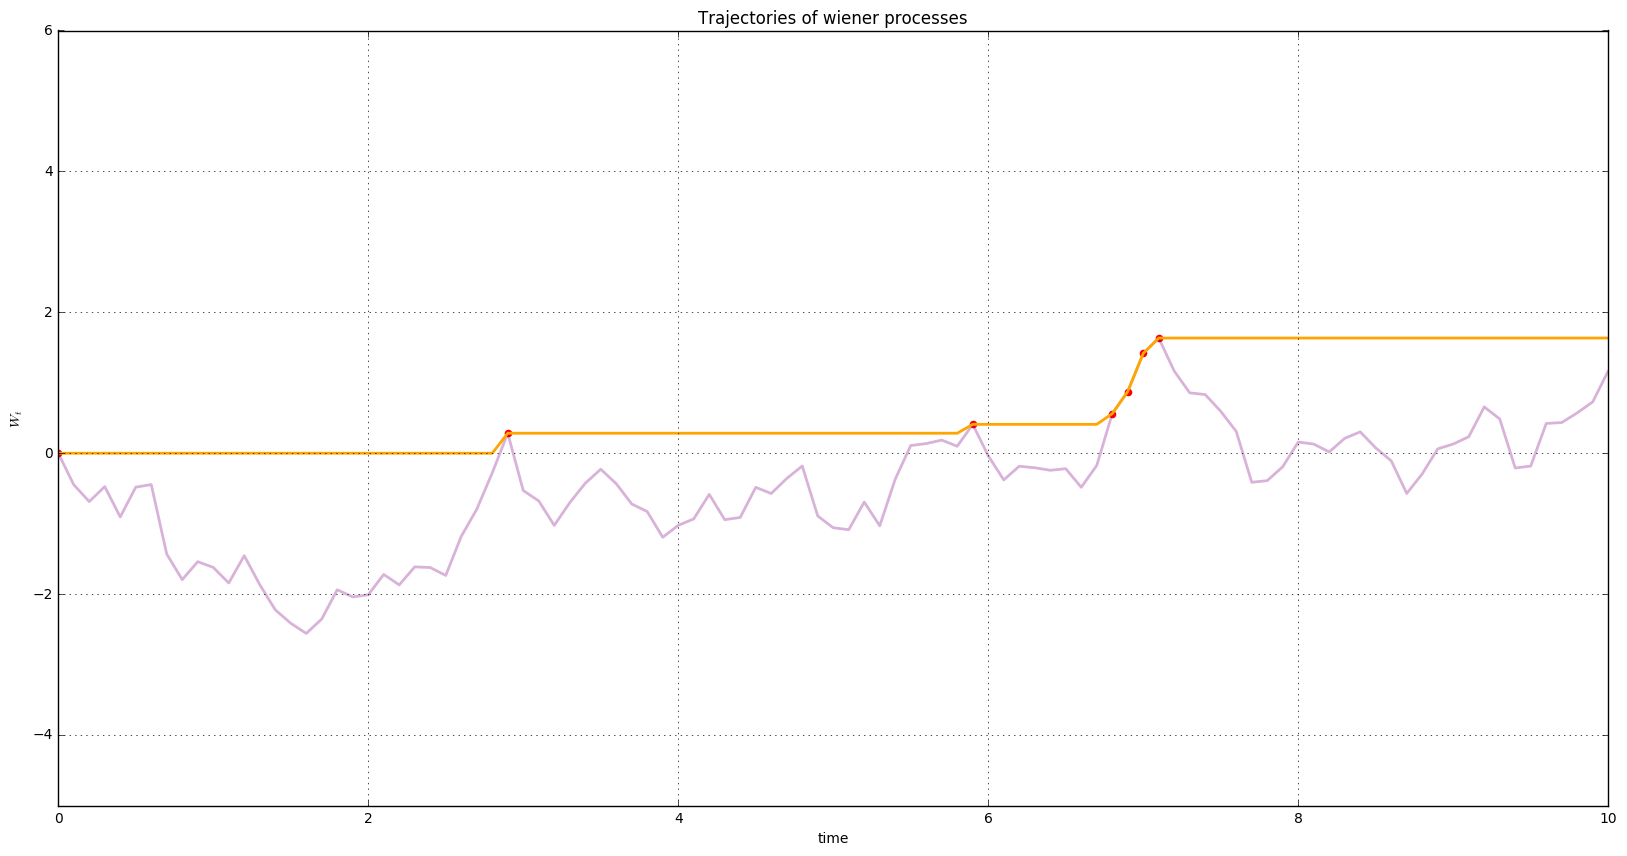

In [22]:
research(5)

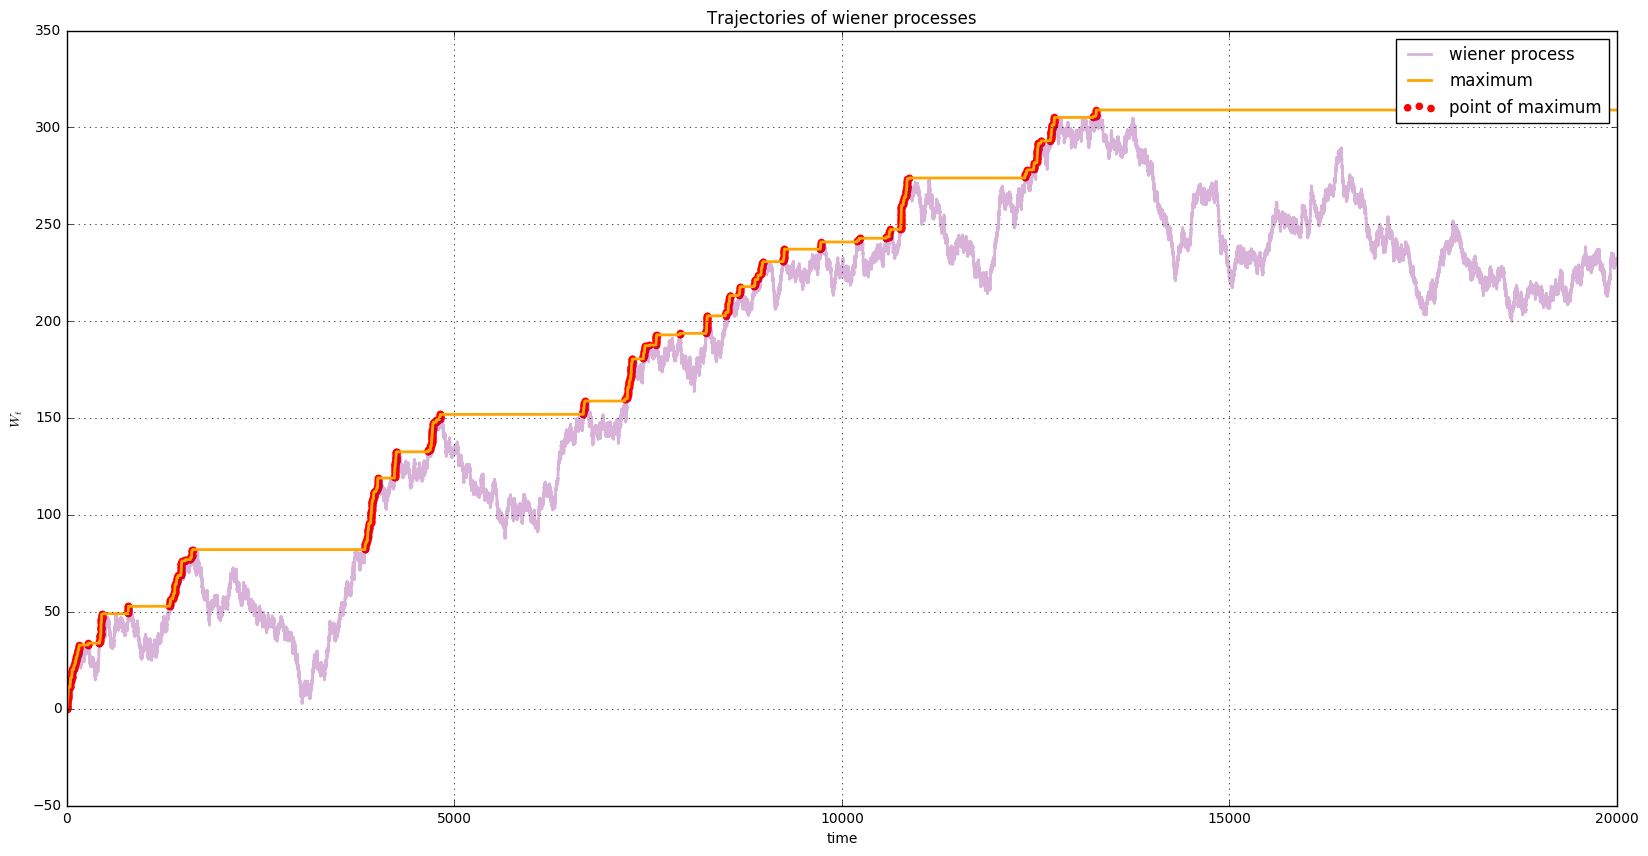

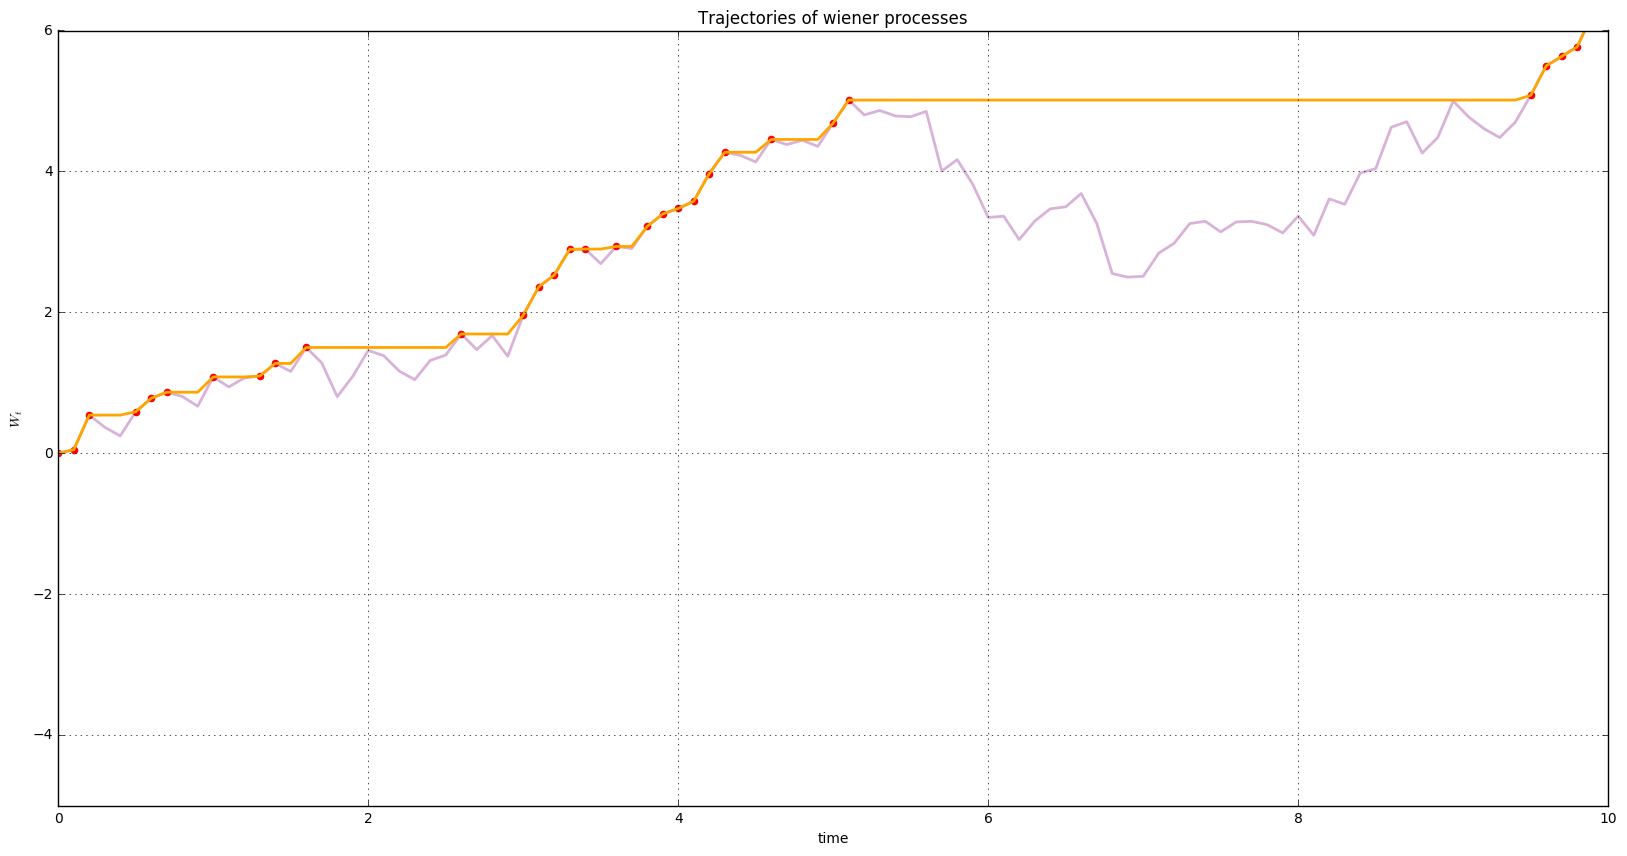

In [23]:
research(37)

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞ —Ç–æ—á–∫–∞—Ö –¥–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –ø–æ–≤—Ç–æ—Ä–Ω–æ –º–∞–∫—Å–∏–º—É–º –Ω–µ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è, –ø—Ä–æ–≤–µ—Ä—é —ç—Ç–æ. –î–ª—è –∫–∞–∂–¥–æ–≥–æ t –∏–∑ –≤—ã–±–æ—Ä–∫–∏ –º–æ–º–µ–Ω—Ç–æ–≤ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ—Å—á–∏—Ç–∞—é –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ—Å—Ç–∏–∂–µ–Ω–∏–π –º–∞–∫—Å–∏–º—É–º–∞ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ [1, t].

In [7]:
numofmax = np.ones_like(paths)
for i in np.arange(len(paths)):
    max0i = -1
    for j in np.arange(len(paths[i])):
        if(paths[i][j] == max0i):
            numofmax[i][j] += 1
        if(paths[i][j] > max0i):
            max0i = paths[i][j]
            

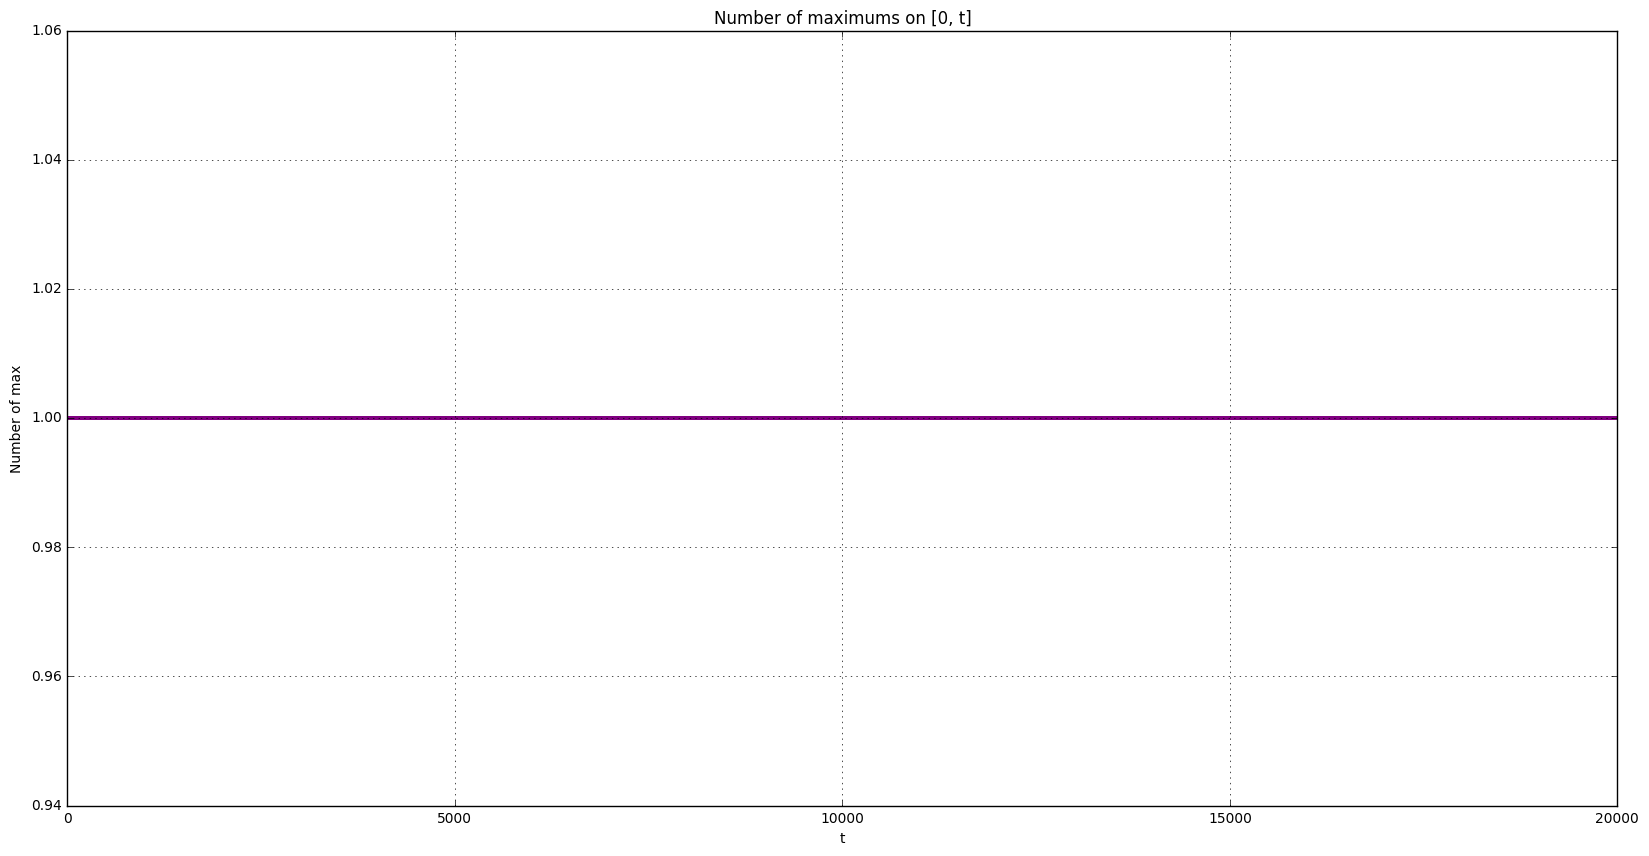

In [8]:
plt.figure(figsize=(20, 10))
for i in range(path_count):
    plt.plot(t, numofmax[i], lw=2, alpha=0.3, color='purple')
plt.grid()
plt.title('Number of maximums on [0, t]')
plt.xlabel('t')
plt.ylabel('Number of max')
plt.show()

–ù–∞ –¥–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –ø–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –Ω–∞ –ª—é–±–æ–º –æ—Ç—Ä–µ–∑–∫–µ –≤–∏–¥–∞ [0, t] –µ—Å—Ç—å –≤—Å–µ–≥–æ –æ–¥–∏–Ω –º–∞–∫—Å–∏–º—É–º, –≤ —Ä–∞–º–∫–∞—Ö –¥–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –Ω–µ–ª—å–∑—è, –ø–æ—ç—Ç–æ–º—É –ª–æ–≥–∏—á–Ω–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å:
#### –ì–∏–ø–æ—Ç–µ–∑–∞ - $X_t = 1$ –ø–æ—á—Ç–∏ –Ω–∞–≤–µ—Ä–Ω–æ–µ, –≥–¥–µ $X_t$ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–∞–∫—Å–∏–º—É–º–æ–≤ –≤–∏–Ω–µ—Ä–æ–≤—Å–∫–æ–≥–æ –ø—Ä–æ—Ü–µ—Å—Å–∞ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ [0, t]

### –î–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ –≥–∏–ø–æ—Ç–µ–∑—ã

–ü–æ–∫–∞–∂–µ–º, —á—Ç–æ –¥–ª—è –ª—é–±–æ–≥–æ –æ—Ç—Ä–µ–∑–∫–∞ [1, x] –º–∞–∫—Å–∏–º—É–º –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –≤—Å–µ–≥–æ 1 —Ä–∞–∑.
–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º –ø—Ä–æ—Ç–∏–≤–Ω–æ–µ, —á—Ç–æ —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω–æ $\exists a<b<c<d \in Q : sup_{t \in [a, b]} W_t = sup_{t \in [c, d]} W_t$
–ü–æ—ç—Ç–æ–º—É –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, —á—Ç–æ –¥–ª—è —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö  a, b, c, d –≤–µ—Ä–æ—è–Ω–æ—Å—Ç—å —ç—Ç–æ–≥–æ —Å–æ–±—ã—Ç–∏—è —Ä–∞–≤–Ω–∞ –Ω—É–ª—é.
–í–≤–µ–¥–µ–º $B(s) = W_{c+s} - W_{c} $. –¢–∫ $W_t$ –∏–º–µ–µ—Ç –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø—Ä–∏—Ä–∞—â–µ–Ω–∏—è, –ø–æ B(s) –Ω–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –≤—Å–µ—Ö $W_t, t<c$, –≤ —á–∞—Å—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∏ $t \in [a, b]$.
$$P(sup_{t \in [a, b]} W_t = sup_{t \in [c, d]} W_t) = EI(sup_{t \in [a, b]} W_t = W_c + sup_{s \in [0, d-c]} B_s) = 
\int_{R^2} I(x-y = W_c) dp(x, y) $$ –¢–∞–∫ $W_t$ –∏ $B_s$ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã, —Ç–æ x –∏ y –º–æ–∂–Ω–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å, W_c - –∫–æ–Ω—Å—Ç–∞–Ω—Ç–∞, –ø–æ—ç—Ç–æ–º—É –ø–æ–ª—É—á–∞–µ—Ç—Å—è $$ \int_{-\infty}^{+\infty}dp_1(x)\int_{-\infty}^{+\infty} I(x-y = W_c) dp_2(y) = \int_{-\infty}^{+\infty}dp_1(x)\int_{x-W_c}^{x-W_c} dp_2(y) = 0$$
–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –¥–æ–∫–∞–∑–∞–Ω–æ —á—Ç–æ $P(X_t=1) = 1$

In [ ]:
from v import WinerProccess, winer_proccess_path